In [ ]:
import torch
import torch.nn as nn
from PIL import Image
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

import os
import math

In [101]:
import torch.nn.functional as F

In [102]:
PATH= Path('data-mnist/mnist/')

In [54]:
img = np.array(Image.open("img_10531.jpg"))

In [55]:
img.shape

(28, 28)

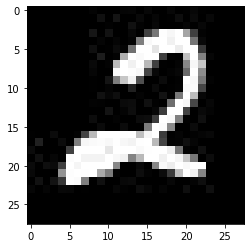

In [56]:
plt.imshow(img, cmap = "gray");

CREATING KERNEL MODEL 

In [57]:
kernel = np.array([-1,1])

In [58]:
out = np.zeros((28,27))

In [59]:
image.shape

(28, 28)

In [60]:
def conv(image,kernel):
    out = np.zeros(image.shape)
    image = np.pad(image,[(0,0),(0,1)],"edge") 
    
    for i in range(image.shape[0]):
        
        for j in range(image.shape[1]-1):
            out[i][j] = abs((image[i][j:j+2]*kernel).sum())
    return out 

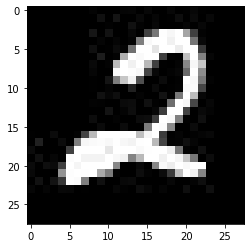

In [61]:
plt.imshow(image,cmap="gray")

In [62]:
out = conv(image,kernel)

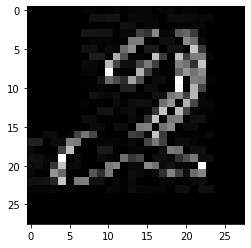

In [63]:
plt.imshow(out,cmap="gray")

if i change numpy.pad parameters, in generally never changes but in "maximum" parameters, there were some changes in right side

#i changed parameters as "constant","maximum","minimum","reflect" etc.

In [64]:
def log_softmax(x):
    return (x.exp()/(x.exp().sum(-1,keepdim=True)) + 1e-20).log()

Homework part

In [ ]:
![hm.png]

In [ ]:
def log_softmax(x):
    max_x = x.max()
    sum_x= max_x + (x-max_x).exp().sum(-1,keepdim=True)+ 1e-20
    

In [65]:
def nll(preds,actuals):
    return -preds[range(actuals.shape[0]),actuals].mean()

In [66]:
def validation_acc(model):
    return torch.stack([accuracy(model(xb),yb) for xb,yb in valid_dl]).mean().item()

In [67]:
def accuracy(preds,yb):
    return (torch.argmax(preds,dim = 1, keepdim = True)==yb).float().mean()

In [68]:
def loss_func(preds,targets):
    preds = log_softmax(preds)
    return nll(preds,targets)

In [69]:
def train(model,epochs =5,valid_epoch=5):
    for epoch in range(epochs):
        for xb,yb in train_dl:
            
            preds = model(xb)
            loss = loss_func(preds,yb.squeeze())
            loss.backward()
            optim.step()
            optim.zero_grad()
            
        if epoch % valid_epoch == 0:
            print(validation_acc(model))    

In [70]:
def _get_files(p,fs,extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith(".")
          and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [71]:
class Dataset():
    def __init__(self,x,y):
        self.x,self.y = x,y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    
class DataLoader():
    def __init__(self,ds,bs):
        self.ds,self.bs = ds,bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)
        
        for i in range(0,n,self.bs):
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]
            

1.feeding only raw pixels

In [72]:
def create_ds_from_file(src):
    imgs,labels = [],[]
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path,t,extensions = [".jpg",".png"])
        for e in t:
            l = [np.array(Image.open(e)).reshape(28*28)]
            imgs += l 
        labels += ([label] * len(t))
    return torch.tensor(imgs, dtype = torch.float32), torch.tensor(labels, dtype = torch.long).view(-1,1)

In [73]:
trn_x,trn_y = create_ds_from_file(PATH/"train")

data-mnist\mnist\train\0
data-mnist\mnist\train\1
data-mnist\mnist\train\2
data-mnist\mnist\train\3
data-mnist\mnist\train\4
data-mnist\mnist\train\5
data-mnist\mnist\train\6
data-mnist\mnist\train\7
data-mnist\mnist\train\8
data-mnist\mnist\train\9


In [74]:
val_x,val_y = create_ds_from_file(PATH/"validation")

data-mnist\mnist\validation\0
data-mnist\mnist\validation\1
data-mnist\mnist\validation\2
data-mnist\mnist\validation\3
data-mnist\mnist\validation\4
data-mnist\mnist\validation\5
data-mnist\mnist\validation\6
data-mnist\mnist\validation\7
data-mnist\mnist\validation\8
data-mnist\mnist\validation\9


In [75]:
mean = trn_x.mean()
std = trn_x.std()
trn_x = (trn_x - mean) / std
val_x = (val_x - mean) / std

In [76]:
mean

tensor(34.3409)

In [77]:
std

tensor(77.5014)

In [78]:
trn_x.mean()

tensor(2.2117e-05)

In [79]:
trn_x.std()

tensor(1.0000)

In [80]:
val_x.mean()

tensor(0.0042)

In [81]:
val_x.std()

tensor(1.0038)

In [82]:
train_ds = Dataset(trn_x,trn_y)

In [83]:
valid_ds = Dataset(val_x,val_y)

In [84]:
train_dl = DataLoader(train_ds,256)

In [85]:
valid_dl = DataLoader(train_ds,256)

In [86]:
model = nn.Sequential(
    nn.Linear(784,60),
    nn.ReLU(),
    nn.Linear(60,10)
)

In [87]:
optim = torch.optim.SGD(model.parameters(),lr=0.001)

In [88]:
train(model,50,5)

0.2923177182674408
0.758830726146698
0.8311261534690857
0.8532915115356445
0.8653026819229126
0.8743297457695007
0.8814420700073242
0.8861146569252014
0.8896046876907349
0.8931565880775452


In [89]:
def conv_batch(img, kernel):
    
    img = img.view(-1,28,28)
    out = torch.zeros(img.shape)
    
    for i in range(img.shape[0]):
        img_temp = np.pad(img[i],[(0, 0), (0, 1)],"edge")
        for j in range(img.shape[1]):

            for k in range(img.shape[2]-1):
                out[i][j][k] = abs((img_temp[j][k:k+2] * kernel).sum())
    return out.view(-1, 784)

In [90]:
class Dataset():
    def __init__(self, x, y): 
        self.x,self.y = x,y
    def __len__(self): 
        return len(self.x)
    def __getitem__(self, i): 
        return conv_batch(self.x[i], kernel),self.y[i]

class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)

        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

feeding features extracted with edge detection

In [92]:
def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            l = [conv(np.array(Image.open(e)), kernel).reshape(28*28)]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

In [93]:
trn_x = create_ds_from_file(PATH/"train")

data-mnist\mnist\train\0
data-mnist\mnist\train\1
data-mnist\mnist\train\2
data-mnist\mnist\train\3
data-mnist\mnist\train\4
data-mnist\mnist\train\5
data-mnist\mnist\train\6
data-mnist\mnist\train\7
data-mnist\mnist\train\8
data-mnist\mnist\train\9


In [94]:
trn_y = create_ds_from_file(PATH/"train")

data-mnist\mnist\train\0
data-mnist\mnist\train\1
data-mnist\mnist\train\2
data-mnist\mnist\train\3
data-mnist\mnist\train\4
data-mnist\mnist\train\5
data-mnist\mnist\train\6
data-mnist\mnist\train\7
data-mnist\mnist\train\8
data-mnist\mnist\train\9


In [95]:
val_x = create_ds_from_file(PATH/"validation")

data-mnist\mnist\validation\0
data-mnist\mnist\validation\1
data-mnist\mnist\validation\2
data-mnist\mnist\validation\3
data-mnist\mnist\validation\4
data-mnist\mnist\validation\5
data-mnist\mnist\validation\6
data-mnist\mnist\validation\7
data-mnist\mnist\validation\8
data-mnist\mnist\validation\9


In [96]:
val_y = create_ds_from_file(PATH/"validation")

data-mnist\mnist\validation\0
data-mnist\mnist\validation\1
data-mnist\mnist\validation\2
data-mnist\mnist\validation\3
data-mnist\mnist\validation\4
data-mnist\mnist\validation\5
data-mnist\mnist\validation\6
data-mnist\mnist\validation\7
data-mnist\mnist\validation\8
data-mnist\mnist\validation\9


In [ ]:
mean = trn_x.mean()
std=trn_x.std()
trn_x = (trn_x - mean)/ std
mean, std,trn_x.mean(),trn_x.std()

In [ ]:
val_x = (val_x-mean)/std
val_x.mean(), val_x.std()

In [ ]:
train_ds = Dataset(trn_x, trn_y)
valid_ds = Dataset(val_x,val_y)
train_dl = DataLoader(train_ds, 256)
valid_dl = DataLoader(valid_ds, 256)

In [ ]:
model = nn.Sequential(
    nn.Linear(784,60),
    nn.ReLU(),
    nn.Linear(60,10)
)

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train(model,50,5)

FEEDING BOTH FEATURES WE EXTRACTED WITH EDGE DETECTION AND RAW PIXEL IMAGES

In [ ]:
def create_ds_from_file(src):
    imgs, labels = [], []
    
    for label in range(10):
        path = src/str(label)
        print(path)
        t = [o.name for o in os.scandir(path)]
        t = _get_files(path, t, extensions = [".jpg", ".png"])
        for e in t:
            img = np.array(Image.open(e))
            l = [np.concatenate((conv(img, kernel).reshape(-1), img.reshape(-1)))]
            imgs += l
        labels += ([label] * len(t))
    return torch.tensor(imgs,  dtype=torch.float32), torch.tensor(labels, dtype=torch.long).view(-1,1)

In [ ]:
trn_x = create_ds_from_file(PATH/"train")

In [ ]:
trn_y = create_ds_from_file(PATH/"train")

In [ ]:
val_x = create_ds_from_file(PATH/"validation")

In [ ]:
val_y = create_ds_from_file(PATH/"validation")

HOMEWORK PART

In [ ]:
mean = trn_x[:,0:28*28].mean()
std = trn_x[:,0:28*28].std()
trn_x[:,0:28*28]=(trn_x[:,0:28*28] - mean ) / std

std,mean, trn_x[:,0:28*28].std(), trn_x[:,0:28*28].mean()

In [ ]:
mean = trn_x[:,784:1568].mean()
std = trn_x[:,784:1568].std()
trn_x[:,784:1568]=(trn_x[:,784:1568] - mean ) / std

std,mean, trn_x[:,784:1568].std(), trn_x[:,784:1568].mean()

In [ ]:
plt.imshow(trn_x[10531].view(56,28), cmap = "gray");